## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [79]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

In [34]:
data1 = pd.DataFrame(data['data'], columns=data['feature_names'])
target = pd.DataFrame(data['target'],columns=['result'])

In [35]:
data1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Taget 是判定有無brest cancer, so use logistic regression

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

In [40]:
x_train, x_test, y_train, y_test = train_test_split(data1, target, test_size=0.1, random_state=4)

In [44]:
log_reg = LogisticRegression().fit(x_train, y_train)
lo_reg_y_pred = log_reg.predict(x_test)

In [49]:
acc = accuracy_score(y_test, lo_reg_y_pred)

In [50]:
acc

0.8771929824561403

In [51]:
from sklearn.datasets import load_linnerud

In [52]:
linnerud_data = load_linnerud()
linnerud = pd.DataFrame(linnerud_data['data'], columns=linnerud_data['feature_names'])
linnerud_target = pd.DataFrame(linnerud_data['target'], columns=linnerud_data['target_names'])

In [65]:
train_X, test_X, train_Y, test_Y = train_test_split(linnerud, linnerud_target, test_size = 0.1, random_state=4)

In [69]:
linear_reg = LinearRegression().fit(train_X, train_Y)

In [71]:
y_pred_lin = linear_reg.predict(test_X)

In [72]:
# 可以看回歸模型的參數值
print('Coefficients: ', linear_reg.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(test_Y, y_pred_lin))

Coefficients:  [[-1.19004472 -0.20460599  0.07097591]
 [-0.21874881 -0.0376129   0.02673785]
 [ 0.15574854  0.04070174 -0.02307785]]
Mean squared error: 722.87


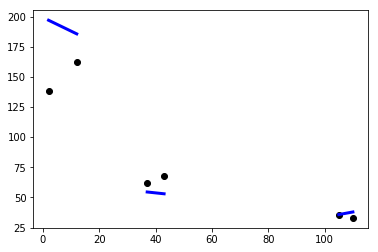

In [80]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(test_X, test_Y,  color='black')
plt.plot(test_X, y_pred_lin, color='blue', linewidth=3)
plt.show()

圖真的是這樣嗎??